In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [18]:
# 2020 Data
full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']
index_df['dates'] = index_df['dates'].astype('datetime64[ns]')

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == 'INX']
ndaq_df = index_df.loc[index_df['stock'] == 'NDAQ']

C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
# 2008 Data
full_2008_df = pd.read_csv("../../MVP/Data/full_2008_df.csv")

index_08_df = full_2008_df[full_2008_df['category'] == 'Index']
index_08_df['dates'] = index_08_df['dates'].astype('datetime64[ns]')

dji_08_df = index_08_df.loc[index_08_df['stock'] == 'DJI']
inx_08_df = index_08_df.loc[index_08_df['stock'] == 'INX']
ndaq_08_df = index_08_df.loc[index_08_df['stock'] == 'NDAQ']

C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


dates       datetime64[ns]
stock               object
open               float64
close              float64
high               float64
low                float64
volume               int64
category            object
dtype: object

In [31]:
def plot_data(df_20, df_08, title, title_08):
    
    #Zooming in around crashes (1 month prior 1 month post)
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20 = (df_20['dates'] >= '2020-01-28')
    crash_20_df = df_20.loc[crash_20]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]

    #Plotting 2020 crash data vs 2008 crash data
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(211)
    crash_20_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
   # plt.xticks(crash_20_df['dates'])
    plt.grid()
    
    x_20 = mdates.date2num(crash_20_df['dates'].tolist())
    y_20 = crash_20_df['close'].tolist()
    z_20 = np.polyfit(x_20, y_20, 8)
    p_20 = np.poly1d(z_20)
    plt.plot(x_20,p_20(x_20), 'r--')
                         
    ax = fig.add_subplot(212)
    crash_08_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title_08)
    plt.grid()
    
    x_08 = mdates.date2num(crash_08_df['dates'].tolist())
    y_08 = crash_08_df['close'].tolist()
    z_08 = np.polyfit(x_08, y_08, 8)
    p_08 = np.poly1d(z_08)
    plt.plot(x_08,p_08(x_08), 'r--')
             
    plt.tight_layout()
    plt.show()    
    
    return ax

C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned


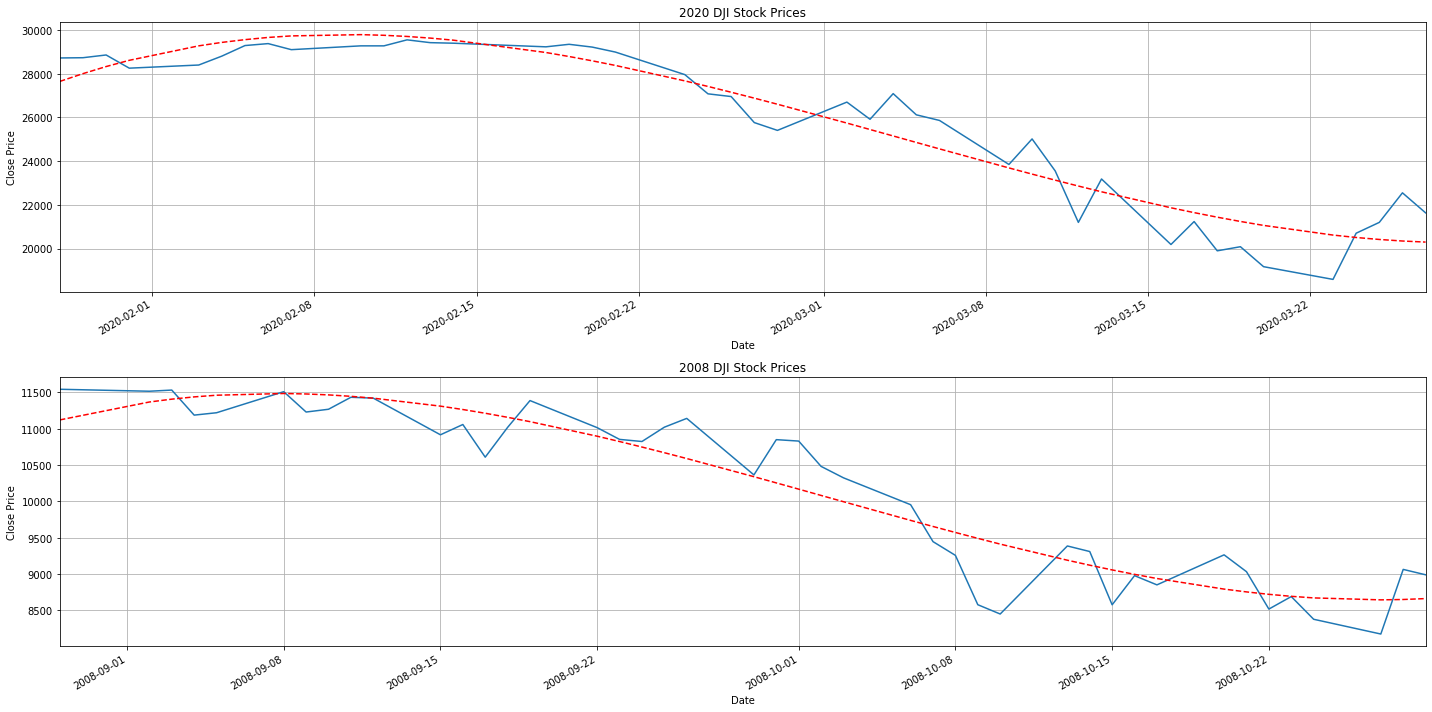

In [32]:
DJI_chart = plot_data(dji_df, dji_08_df, '2020 DJI Stock Prices', '2008 DJI Stock Prices')

C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned


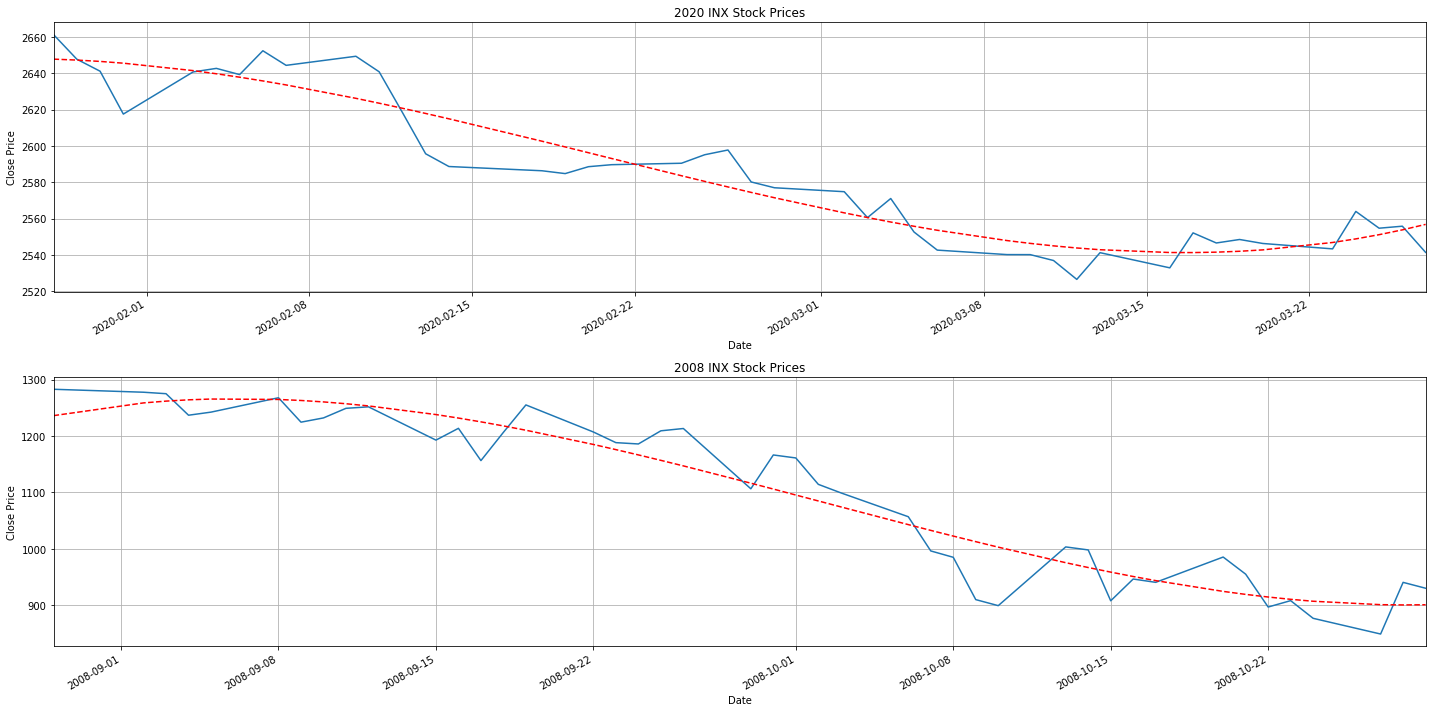

In [33]:
INX_chart = plot_data(inx_df, inx_08_df, '2020 INX Stock Prices', '2008 INX Stock Prices')

C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned
C:\Users\nitec\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RankWarning: Polyfit may be poorly conditioned


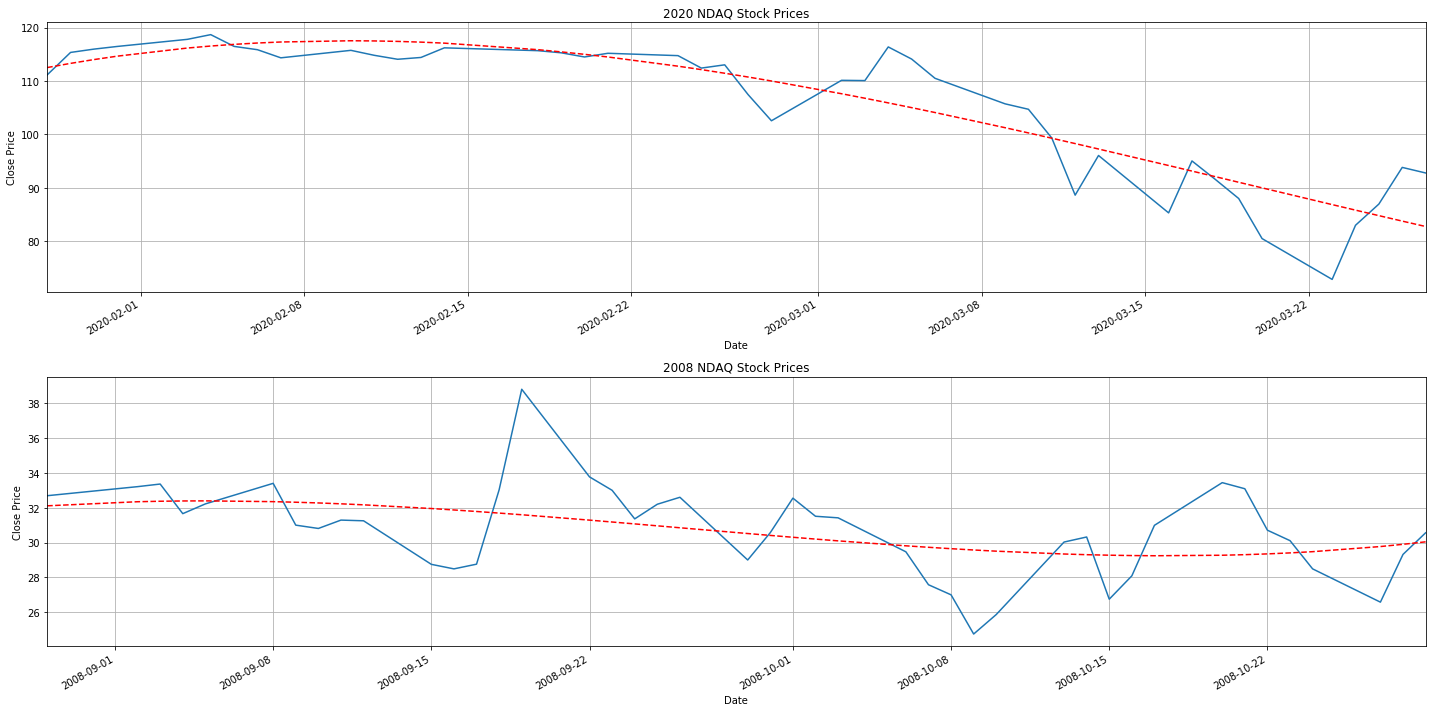

In [34]:
NDAQ_chart = plot_data(ndaq_df, ndaq_08_df, '2020 NDAQ Stock Prices', '2008 NDAQ Stock Prices')